In [4]:
import pandas as pd

In [5]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import tensorflow as tf

In [17]:
df = pd.read_csv('RSCCASN.csv', parse_dates=True, index_col='DATE')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [21]:
# df

In [22]:
df.columns = ['sales']

<AxesSubplot:xlabel='DATE'>

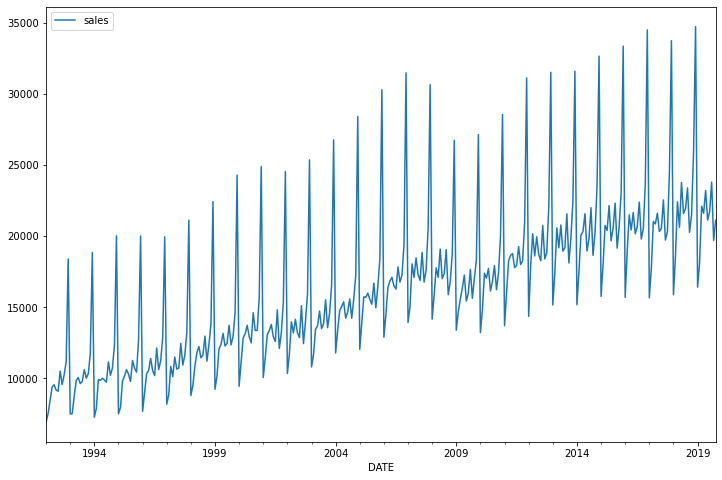

In [23]:
df.plot(figsize=(12,8))

In [24]:
len(df)

334

In [26]:
len(df)-18

316

In [27]:
test_size = 18
test_ind = len(df) - test_size

In [28]:
train = df.iloc[:test_ind]

In [29]:
test = df.iloc[test_ind:]

In [30]:
train

,sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [31]:
test

,sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
scaler.fit(train)

MinMaxScaler()

In [35]:
scaler_train = scaler.transform(train)

In [36]:
scaler_test = scaler.transform(test)

In [37]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [38]:
len(test)

18

In [39]:
len(train)

316

In [40]:
length = 12
generator = TimeseriesGenerator(scaler_train,scaler_train,
                               length=length,
                               batch_size =1)

In [42]:
x,y=generator[0]

In [43]:
x

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [44]:
y

array([[0.02047633]])

In [46]:
scaler_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [47]:
from tensorflow.keras.models import Sequential

In [49]:
from tensorflow.keras.layers import Dense, LSTM

In [50]:
n_features = 1

In [51]:
model = Sequential()

In [52]:
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
unified_lstm (UnifiedLSTM)   (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [54]:
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [57]:
validation_generator = TimeseriesGenerator(scaler_test,scaler_test,length=length, batch_size=1)

In [58]:
model.fit_generator(generator, epochs=20, validation_data = validation_generator, callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 22s 74ms/step - loss: 0.0251 - val_loss: 0.0066
Epoch 2/20
304/304 [==============================] - 12s 41ms/step - loss: 0.0166 - val_loss: 0.0053
Epoch 3/20
304/304 [==============================] - 13s 44ms/step - loss: 0.0123 - val_loss: 0.0098
Epoch 4/20
304/304 [==============================] - 13s 44ms/step - loss: 0.0056 - val_loss: 0.0042
Epoch 5/20
304/304 [==============================] - 16s 52ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 6/20
304/304 [==============================] - 16s 53ms/step - loss: 0.0029 - val_loss: 6.9983e-04
Epoch 7/20
304/304 [==============================] - 13s 41ms/step - loss: 0.0041 - val_loss: 0.0048
Epoch 8/20
304/304 [==============================] - 8s 25ms/step - loss: 0.0024 - val_loss: 0.0020


In [59]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

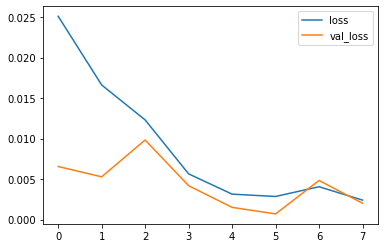

In [60]:
losses.plot()

In [67]:
test_predications = []

first_eval_batch = scaler_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predications.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

In [68]:
true_predications = scaler.inverse_transform(test_predications)

In [69]:
test['Predications'] = true_predications

C:\Users\Nand Kishore\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
test

,sales,Predications
DATE,,
2018-05-01,23764,22238.087035
2018-06-01,21589,21170.208887
2018-07-01,21919,21436.596013
2018-08-01,23381,23272.095873
2018-09-01,20260,20877.156452
2018-10-01,21473,21507.301275
2018-11-01,25831,25327.022232
2018-12-01,34706,35996.718262
2019-01-01,16410,17246.156338


<AxesSubplot:xlabel='DATE'>

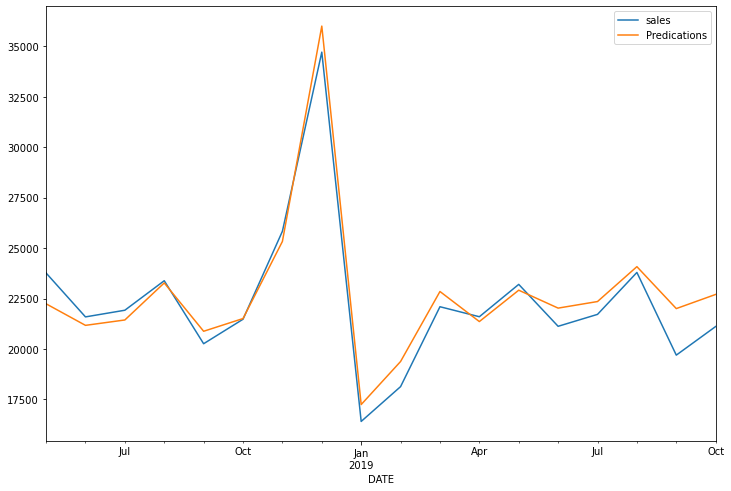

In [71]:
test.plot(figsize=(12,8))

In [72]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [73]:
length = 12

In [75]:

generator = TimeseriesGenerator(scaled_full_data, scaled_full_data,length=length,batch_size=1)

In [76]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit_generator(generator, epochs=8)

Epoch 1/8
322/322 [==============================] - 19s 60ms/step - loss: 0.0256
Epoch 2/8
322/322 [==============================] - 12s 36ms/step - loss: 0.0168
Epoch 3/8
322/322 [==============================] - 12s 37ms/step - loss: 0.0080
Epoch 4/8
322/322 [==============================] - 11s 36ms/step - loss: 0.0052
Epoch 5/8
322/322 [==============================] - 15s 46ms/step - loss: 0.0030
Epoch 6/8
322/322 [==============================] - 12s 37ms/step - loss: 0.0017
Epoch 7/8
322/322 [==============================] - 12s 36ms/step - loss: 0.0024
Epoch 8/8
322/322 [==============================] - 12s 37ms/step - loss: 0.0016


In [77]:
forecast = []
periods = 12
first_eval_batch = scaler_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

In [78]:
forecast = scaler.inverse_transform(forecast)


In [79]:
df

,sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [80]:
forecast

array([[22914.28295422],
       [21866.94310331],
       [22080.65466976],
       [23845.45090961],
       [21498.21911192],
       [22043.49365091],
       [26007.28476715],
       [35707.83587265],
       [18081.20966148],
       [20271.76347852],
       [23662.12650013],
       [22148.52298689]])

In [83]:
forecast_index = pd.date_range(start='2019-10-01', periods=periods, freq="MS")

In [86]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [87]:
forcast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

In [89]:
forcast_df

,Forecast
2019-10-01,22914.282954
2019-11-01,21866.943103
2019-12-01,22080.654670
2020-01-01,23845.450910
2020-02-01,21498.219112
2020-03-01,22043.493651
2020-04-01,26007.284767
2020-05-01,35707.835873
2020-06-01,18081.209661
2020-07-01,20271.763479


<AxesSubplot:>

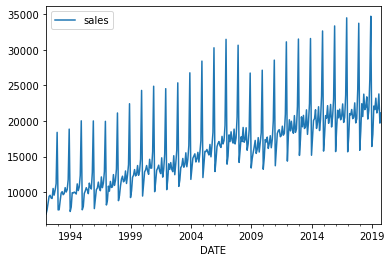

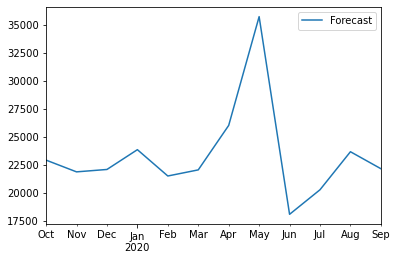

In [91]:
df.plot()
forcast_df.plot()

(576.0, 611.0)

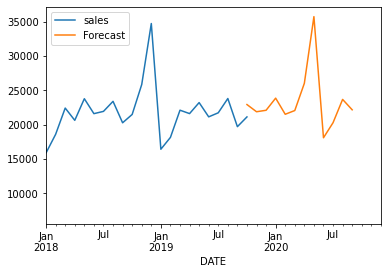

In [94]:
ax = df.plot()
forcast_df.plot(ax=ax)
plt.xlim('2018-01-01', '2020-12-01')